In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

X= data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
train_data = X_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16005,-122.45,37.74,52.0,1596.0,276.0,642.0,273.0,4.3750,NEAR BAY,349500.0
2705,-115.59,32.85,20.0,1608.0,274.0,862.0,248.0,4.8750,INLAND,90800.0
14001,-117.29,34.57,22.0,1054.0,239.0,428.0,239.0,1.2548,INLAND,68300.0
385,-122.29,37.90,49.0,1283.0,238.0,576.0,236.0,3.3333,NEAR BAY,276800.0
17437,-120.45,34.64,17.0,1226.0,277.0,484.0,224.0,3.2167,NEAR OCEAN,112500.0
...,...,...,...,...,...,...,...,...,...,...
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,<1H OCEAN,350000.0
18735,-122.40,40.51,20.0,1750.0,352.0,834.0,340.0,2.4850,INLAND,100600.0
11822,-121.07,38.94,14.0,1710.0,294.0,839.0,297.0,4.7143,INLAND,150700.0
1817,-122.31,37.93,36.0,2403.0,408.0,917.0,404.0,5.0399,NEAR BAY,253400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

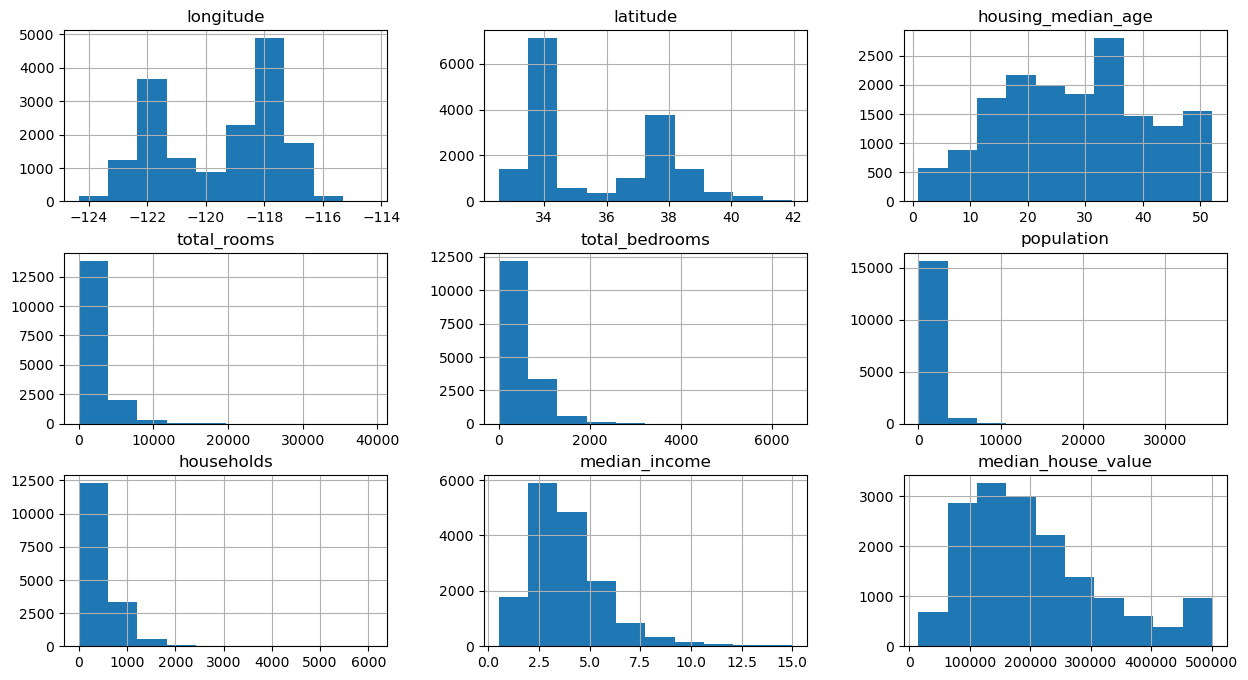

In [10]:
train_data.hist(figsize=(15,8))

<Axes: >

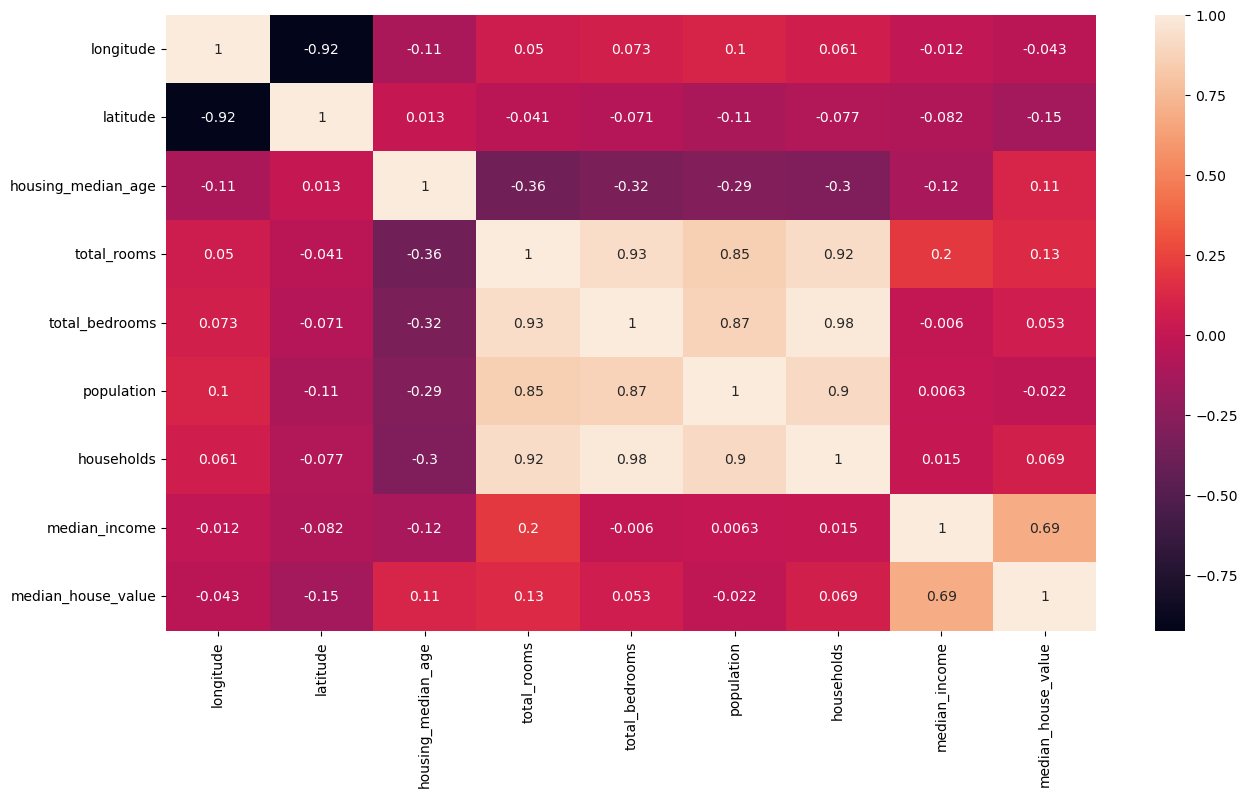

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
#Ngăn ko cho dữ liệu trong histogram bị lệch

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

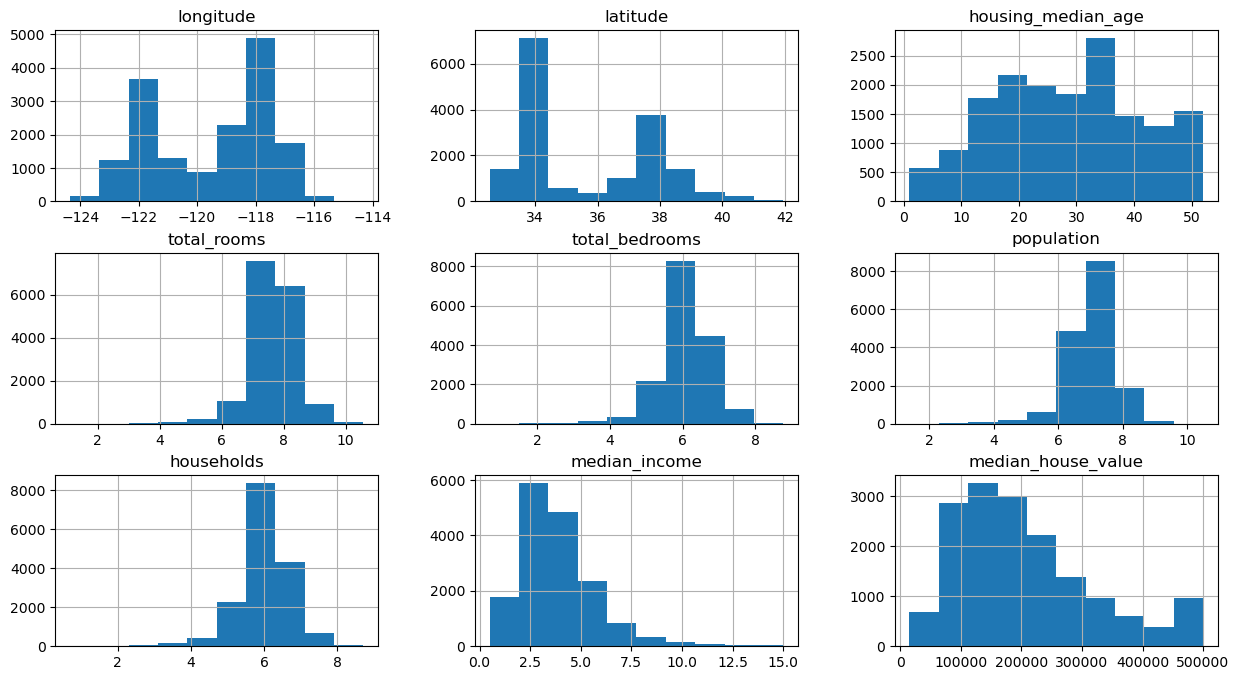

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7225
INLAND        5211
NEAR OCEAN    2087
NEAR BAY      1820
ISLAND           3
Name: count, dtype: int64

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
#Chuyển đổi dữ liệu categorical thành binary do hệ thống ko đọc được dữ liệu string

<Axes: >

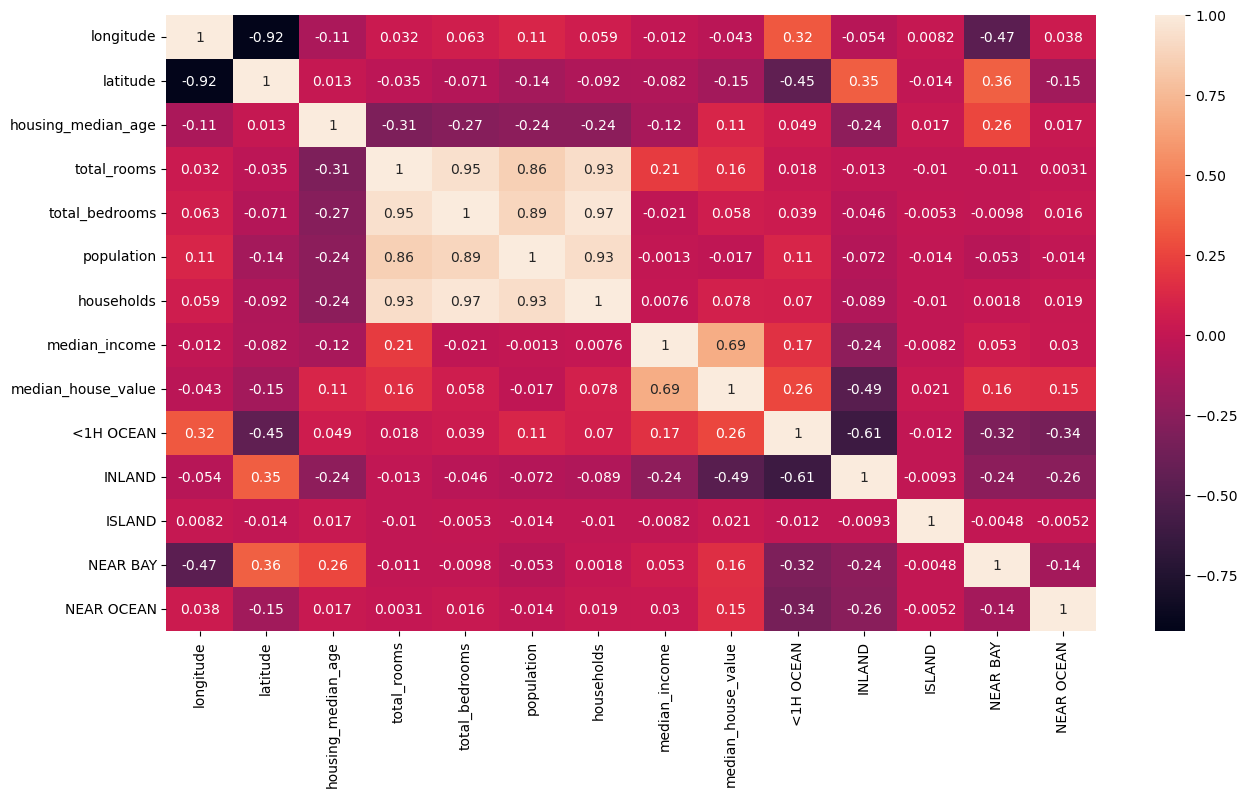

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

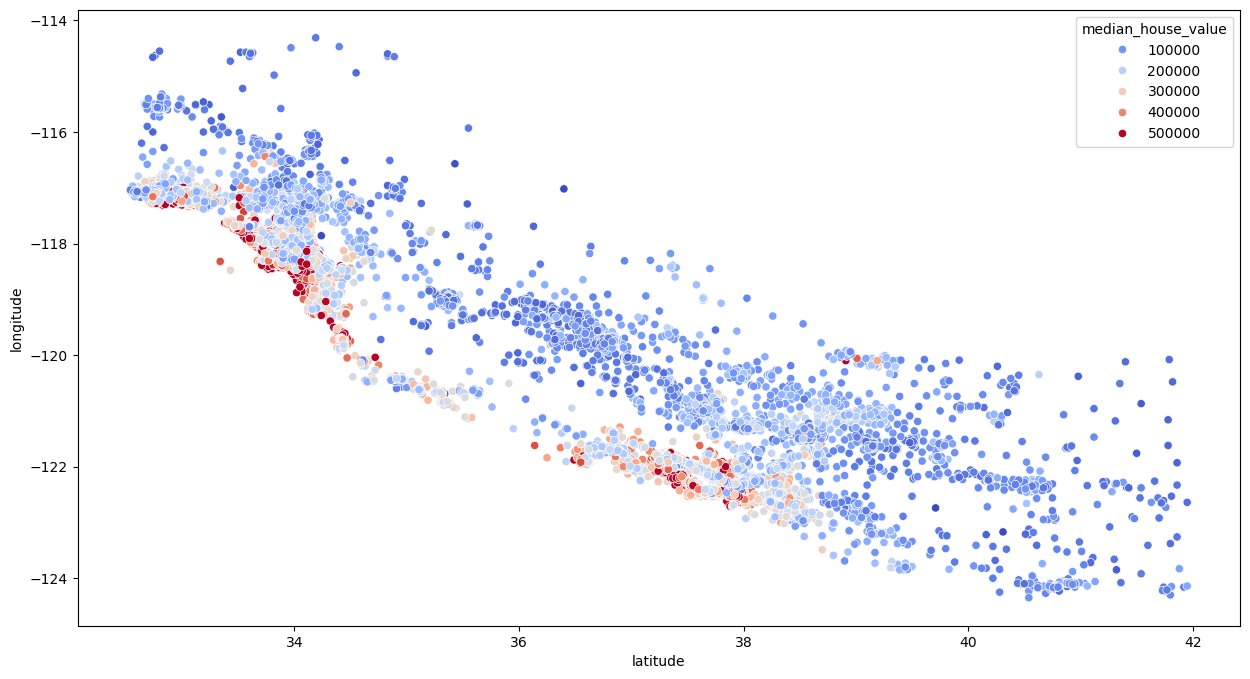

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [18]:
#Creating new features
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_room'] = train_data['total_rooms'] / train_data['households']

<Axes: >

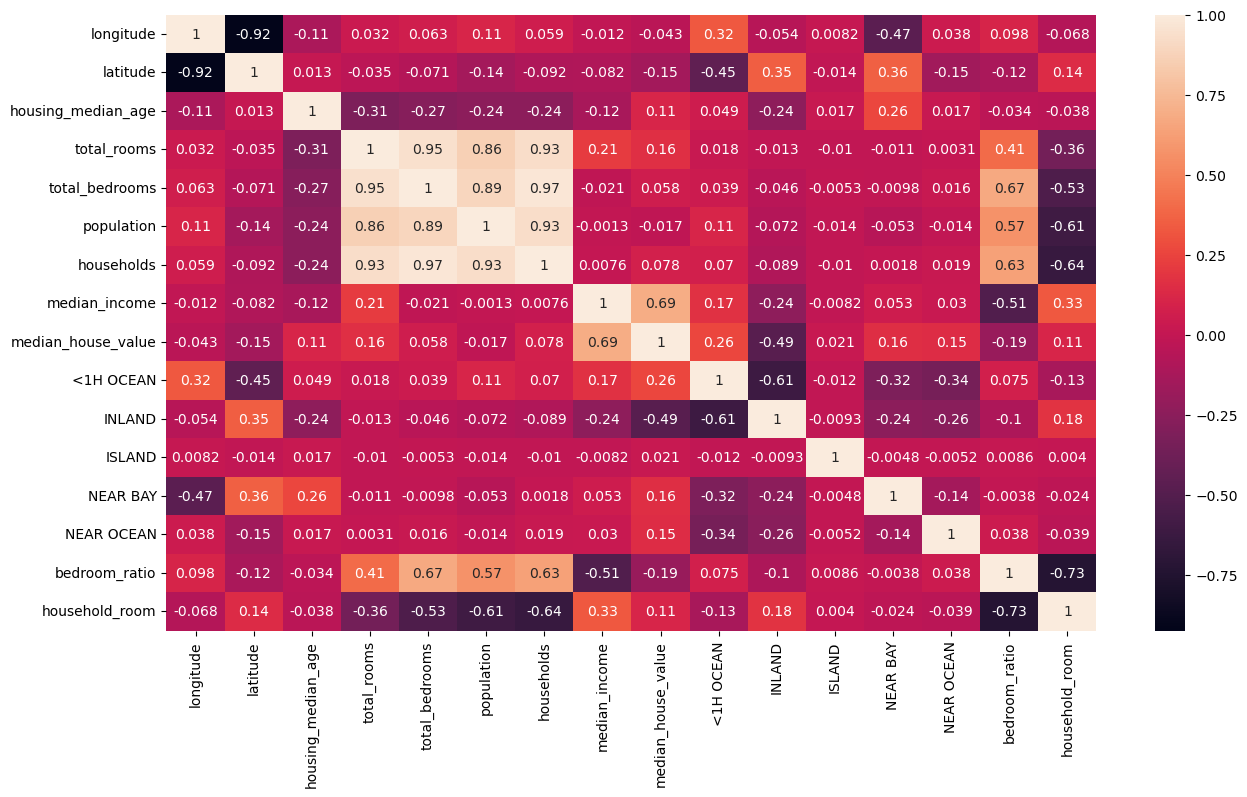

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [20]:
#Train mutiple model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [21]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
#Ngăn ko cho dữ liệu trong histogram bị lệch
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
#Chuyển đổi dữ liệu categorical thành binary do hệ thống ko đọc được dữ liệu string
#Creating new features
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_room'] = test_data['total_rooms'] / test_data['households']

In [22]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [23]:
X_test_s = scaler.transform(X_test)

In [24]:
reg.score(X_test_s, y_test)


0.6732066826437797

In [25]:
# 📌 NOTE: CHUẨN HÓA DỮ LIỆU TRƯỚC KHI HUẤN LUYỆN MÔ HÌNH HỒI QUY TUYẾN TÍNH

"""
✅ Vì sao cần chuẩn hóa?
- Khi các cột đầu vào (feature) có đơn vị hoặc giá trị rất khác nhau 
  (VD: 'total_rooms' lên tới hàng nghìn, còn 'income' chỉ từ 0–10),
  thì Linear Regression sẽ bị lệch — ưu tiên các cột có giá trị lớn.

✅ Chuẩn hóa giúp:
- Mô hình hội tụ tốt hơn khi huấn luyện.
- Hệ số hồi quy (coefficient) phản ánh đúng mức độ ảnh hưởng của từng biến.
- Tránh hiện tượng “dominant feature” do scale không đồng đều.

✅ Cách làm:
- Sử dụng StandardScaler hoặc MinMaxScaler để chuẩn hóa X_train.
- Sau đó dùng scaler.transform(X_test) để chuẩn hóa tập test.

❌ Không cần chuẩn hóa với các mô hình như: Decision Tree, Random Forest, XGBoost,...

➡️ Ghi nhớ:
    Linear models + Feature có scale khác nhau → PHẢI chuẩn hóa!
"""

"\n✅ Vì sao cần chuẩn hóa?\n- Khi các cột đầu vào (feature) có đơn vị hoặc giá trị rất khác nhau \n  (VD: 'total_rooms' lên tới hàng nghìn, còn 'income' chỉ từ 0–10),\n  thì Linear Regression sẽ bị lệch — ưu tiên các cột có giá trị lớn.\n\n✅ Chuẩn hóa giúp:\n- Mô hình hội tụ tốt hơn khi huấn luyện.\n- Hệ số hồi quy (coefficient) phản ánh đúng mức độ ảnh hưởng của từng biến.\n- Tránh hiện tượng “dominant feature” do scale không đồng đều.\n\n✅ Cách làm:\n- Sử dụng StandardScaler hoặc MinMaxScaler để chuẩn hóa X_train.\n- Sau đó dùng scaler.transform(X_test) để chuẩn hóa tập test.\n\n❌ Không cần chuẩn hóa với các mô hình như: Decision Tree, Random Forest, XGBoost,...\n\n➡️ Ghi nhớ:\n    Linear models + Feature có scale khác nhau → PHẢI chuẩn hóa!\n"

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [27]:
# 📌 NOTE: Chỉ cần scale X, không cần scale y (với Linear Regression)

"""
✅ Scale X để đưa các feature về cùng thang đo → giúp mô hình học hiệu quả hơn.
❌ Không cần scale y vì:
   - Mô hình vẫn học tốt với y gốc.
   - Ta muốn dự đoán y (giá trị thực, như giá nhà) đúng đơn vị ban đầu.

⚠️ Chỉ scale y khi dùng mô hình phức tạp (Neural Network, SVR) hoặc y quá lệch.

➡️ Nhớ: "Scale X để mô hình học tốt, giữ nguyên y để kết quả dễ hiểu."
"""


'\n✅ Scale X để đưa các feature về cùng thang đo → giúp mô hình học hiệu quả hơn.\n❌ Không cần scale y vì:\n   - Mô hình vẫn học tốt với y gốc.\n   - Ta muốn dự đoán y (giá trị thực, như giá nhà) đúng đơn vị ban đầu.\n\n⚠️ Chỉ scale y khi dùng mô hình phức tạp (Neural Network, SVR) hoặc y quá lệch.\n\n➡️ Nhớ: "Scale X để mô hình học tốt, giữ nguyên y để kết quả dễ hiểu."\n'

In [28]:
forest.score(X_test_s, y_test)

0.8123397123031982

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
param_grid = {
"n_estimators":[30,50,100],  # Số lượng cây trong rừng (bạn tự chọn)
"max_features":[8,12,20],  # Số lượng cột được xét tại mỗi lần chia (bạn tự chọn)
"min_samples_split":[2,4,6,8]
}
grid_search= GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",return_train_score=True)
#scoring="neg_mean_squared_error", Tiêu chí đánh giá: MSE (lấy giá trị âm)
#return_train_score=True      # Trả về điểm số trên cả train và validation
grid_search.fit(X_train_s, y_train)
## Tìm tham số tốt nhất cho mô hình Random Forest bằng GridSearchCV với đánh giá MSE qua 5-fold cross-validation

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_forest=grid_search.best_estimator_

In [41]:
best_forest.score(X_test_s, y_test)

0.8089440215576454

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
param_grid = {
"n_estimators":[100,200,300],  # Số lượng cây trong rừng (bạn tự chọn)
"min_samples_split":[2,4],  # Số lượng cột được xét tại mỗi lần chia (bạn tự chọn)
"max_depth":[None,4,8]
}
grid_search= GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",return_train_score=True)
#scoring="neg_mean_squared_error", Tiêu chí đánh giá: MSE (lấy giá trị âm)
#return_train_score=True      # Trả về điểm số trên cả train và validation
grid_search.fit(X_train_s, y_train)
## Tìm tham số tốt nhất cho mô hình Random Forest bằng GridSearchCV với đánh giá MSE qua 5-fold cross-validation

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')